# Calculus figures generation

This notebook contains all the figure generation code for [Section 2.4 Calculus prerequisites]() in the **No Bullshit Guide to Statistics**.

(see formulas and definitions in the book)

#### Notebook setup

We'll start by importing the Python modules we'll need for this notebook.

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)

# %config InlineBackend.figure_format = 'retina'

In [3]:
# set random seed for repeatability
np.random.seed(3)

### Sets


In [13]:
S = {1, 2, 3}
T = {3, 4, 5, 6}

print("S ∪ T =", S.union(T))
print("S ∩ T =", S.intersection(T))
print("S \ T =", S.difference(T))

S ∪ T = {1, 2, 3, 4, 5, 6}
S ∩ T = {3}
S \ T = {1, 2}


### Functions

In [103]:
# define the function g that takes input x
def g(x):
    return x**2

# calling the function g on input x=4
g(4)

16

#### Plotting the graph of the function $g(x)$

<AxesSubplot:>

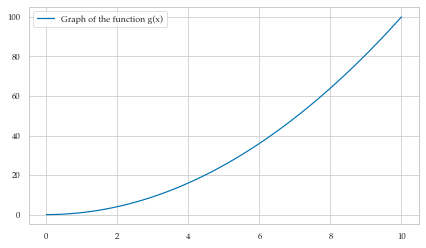

In [104]:
import numpy as np
import seaborn as sns

xs = np.linspace(0, 10, 100)
gxs = g(xs)

sns.lineplot(x=xs, y=gxs, label="Graph of the function g(x)")

In [112]:
# import matplotlib.pyplot as plt
# filename = "figures/graph_of_function_g_eq_x.pdf"

# with plt.rc_context({"figure.figsize":(4,2.7)}):
#     ax = sns.lineplot(x=xs, y=gxs, label="Graph of the function g(x)")
#     ax.figure.tight_layout()
#     ax.set_xlabel('x')
#     ax.set_ylabel('g(x)')
#     ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

In [17]:
import numpy as np

np.sqrt(4)

2.0

In [18]:
np.log(4)

1.3862943611198906

Examples of function-followed-by-inverse-function calculations:

In [19]:
np.sqrt(4)**2

4.0

In [20]:
np.exp(np.log(4))

4.0

### Computing integrals geometrically


See Figure 2.15 in the book that shows the integral under $f(x) = 3$ between $a=0$ and $b=5$.



See also Figure 2.16 that shows the integral under $g(x) = x$ between $a=0$ and $b=5$.


### Computing integrals numerically using SciPy `integrate` methods

There are numerous ways to compute integrals in Python. 
Computing integrals "numerically" means we're splitting the region of integration into thousands or millions of sub-regions, computing the areas of these sub-regions, and adding up the result.

We'll now show some examples using two of the functions form the module `sympy.integrate`:
- `quad(f,a,b)`: high-level function for computing areas (quadratures)
- `trapz(ys,xs)`: low-level function for computing integral using trapezoid approximation



We'll start with the `quad` function.

In [21]:
from scipy.integrate import quad

In [22]:
# define the constant function f(x) = c
def f(x):
    c = 3
    return c

# call the funtion f with input x=333
f(333)

3

In [23]:
quad(f, 0, 5)

(15.0, 1.6653345369377348e-13)

The function `quad` returns two numbers as output: the value of the integral and a precision parameter.
In output of the code, tells us the value of the integral is $\int_0^5 3 dx$ is `15.0` and guarantees the accuracy of this value up to an error of $10^{-13}$.

Since we're usually only interested in the value of the integral, we often select the first output of `quad` so you'll see the code like `quad(...)[0]` in all the code examples below.

In [24]:
quad(f, 0, 5)[0]

15.0

In [25]:
# define the function g(x) = x (line with slope 1)
def g(x):
    return x

# call the funtion g with input x=10
g(10)

10

In [26]:
quad(g, 0, 5)[0]

12.5

#### Trapezoid approximation

Let's now use another approach based on the trapezoid approximation.

We must build array of inputs $x$ and outputs $g(x)$ of the function,
then pass it to `trapz` so it carries out the calculation.

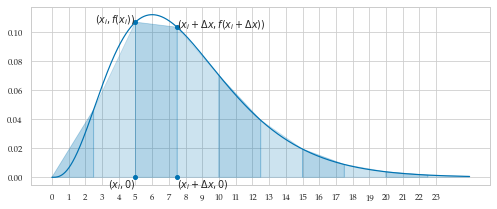

In [27]:
filename = "figures/plot_of_trapezoid_under_chi2_df_eq_8.pdf"

import matplotlib.pyplot as plt
from scipy.stats import chi2

n = 10

X2 = chi2(df=8)
f = X2.pdf

a = 0
b = 25


with plt.rc_context({"figure.figsize":(7,3)}):

    # x and y values for the trapezoid rule
    xs = np.linspace(a, b, n+1)
    ys = f(xs)

    # X and Y values for plotting y=f(x)
    X = np.linspace(a, b, 10000)
    Y = f(X)
    plt.plot(X,Y)
    plt.xticks(range(0,b-1))
    ax = plt.gca()
    # ax.set_title('Approximation to the area under $f(x)$ using n = {} trapezoids.'.format(n), y=0, pad=-30)


    for i in range(n):
        xcoords = [xs[i], xs[i],    xs[i+1],    xs[i+1] ]
        ycoords = [0,     f(xs[i]), f(xs[i+1]), 0      ]
        alpha = 0.2 if i%2==1 else 0.3
        plt.fill(xcoords, ycoords, 'b', edgecolor='b', alpha=alpha)
        if i == 2:
            plt.plot(xs[i],   0,          marker="o", markersize=4, markeredgecolor="b", markerfacecolor="b")
            plt.text(xs[i],   0,          '$(x_i, 0)$', ha='right', va='top')
            plt.plot(xs[i],   f(xs[i]),    marker="o", markersize=4, markeredgecolor="b", markerfacecolor="b")
            plt.text(xs[i],   f(xs[i]),    '$(x_i, f(x_i))$', ha='right')
            plt.plot(xs[i+1], 0,          marker="o", markersize=4, markeredgecolor="b", markerfacecolor="b")
            plt.text(xs[i+1], 0,          '$(x_i+\Delta x, 0)$', ha='left', va='top')
            plt.plot(xs[i+1], f(xs[i+1]),  marker="o", markersize=4, markeredgecolor="b", markerfacecolor="b")
            plt.text(xs[i+1], f(xs[i+1]), '$(x_i+\Delta x, f(x_i+\Delta x))$')


    ax.figure.tight_layout()
    ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)


In [28]:
from scipy.integrate import trapz

In [29]:
m = 1000
xs = np.linspace(0, 5, m)
gxs = g(xs)

trapz(gxs, xs)

12.5

### Computing integrals symbolically using SymPy `integrate`

In [30]:
from sympy import symbols

# define symbolic variables
x, a, b, c = symbols('x a b c')

The `symbols` function creates SymPy symbolic variables.
Unlike ordinary Python variables that hold a particular value,
SymPy variables act as placeholders that can take on any value.

We can use the symbolic variables to create expressions,
just like we do with math variables in pen-and-paper calculations.

#### Constant function $f(x)=c$

In [31]:
fx = c
fx

c

We'll use the SymPy function `integrate` for computing integrals.
We call this function
by passing in the expression we want to integrate as the first argument.
The second argument is a triple $(x,a,b)$,
which specifies the variable of integration $x$,
the lower limit of integration $a$,
and the upper limit of integration $b$.

In [32]:
from sympy import integrate

integrate(fx, (x,a,b))  # = A_f(a,b)

-a*c + b*c

The answer $c\cdot (b-a)$ is the general expression for calculating the area under $f(x)=c$,
for between any starting point $x=a$ and end point $x=b$.
Geometrically, this is just a height-times-width formula for the area of a rectangle.

To compute the specific integral between $a=0$ and $b=5$ under $f(x)=3$,
we use the `subs` (substitute) method,
passing in a Python dictionary of the values we want to "plug" into the general expression.

In [33]:
integrate(fx, (x,a,b)).subs({c:3, a:0, b:5})

15

The integral function $F_0(b) = \int_0^b f(x) dx$ is obtained as follows.

In [34]:
integrate(fx, (x,0,b))  # = F_0(b)

b*c

#### Line $g(x)=x$

In [35]:
gx = 1*x
gx

x

In [36]:
integrate(gx, (x,a,b))  # = A_g(a,b)

-a**2/2 + b**2/2

In [37]:
integrate(gx, (x,a,b))

-a**2/2 + b**2/2

In [38]:
integrate(gx, (x,a,b)).subs({a:0, b:5})

25/2

In [39]:
integrate(gx, (x,a,b)).subs({m:3, a:0, b:5}).evalf()

12.5000000000000

Bonus: the integral function $G_0(b) = \int_0^b g(x) dx$ is obtained as follows.

In [40]:
integrate(gx, (x,0,b))  # = G_0(b)

b**2/2